In [24]:
import numpy as np
import celerite 
from celerite import terms

In [313]:
ppm = 100
per_aper_ratio = 2
t = np.linspace(1, 100, 10000)
periodic_freq = 0.1
aperiodic_freq = 1
A = 0.01

aperiodic_sigma = 1/per_aper_ratio
periodic_sigma = 1
white_noise_sigma = ppm/1e6

# set up a gaussian process with two components and white noise

# non-periodic component
Q = 1. / np.sqrt(2.0)  # related to the frequency of the variability
w0 = 2*np.pi*aperiodic_freq
S0 = (aperiodic_sigma**2.) / (w0 * Q) 
bounds = dict(log_S0=(-15, 15), log_Q=(-15, 15), log_omega0=(-15, 15))
kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0), bounds=bounds)

# periodic component
Q = 1.0
w0 = 2*np.pi*periodic_freq
S0 = (periodic_sigma**2.) / (w0 * Q)
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0), bounds=bounds)

# white noise
kernel += terms.JitterTerm(log_sigma=np.log(white_noise_sigma), bounds=dict(log_sigma=(-15,15)))

gp = celerite.GP(kernel, mean=0, fit_mean=True, fit_white_noise=True)
gp.compute(t, noise)

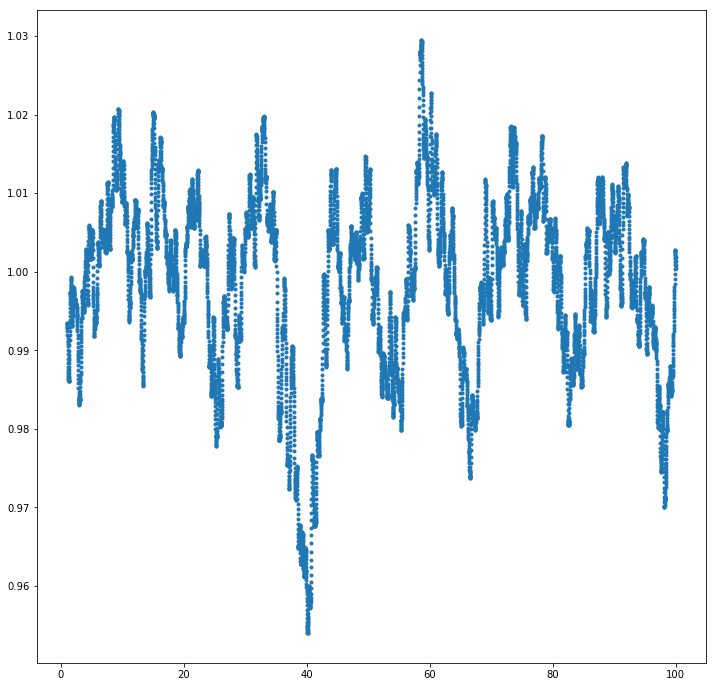

In [315]:
import matplotlib.pyplot as pl
%matplotlib inline

pl.plot(t, A*gp.sample()+1, '.')
pl.gcf().set_size_inches(12, 12)